## Part 1: Gravitational Potential of the Earth
---

### Question 1.1

In [44]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.constants as const
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

def g_pot(M,x_m,y_m,x,y):
    r = np.sqrt((x-x_m)**2 + (y-y_m)**2)
    
    if math.isclose(r,0):
        return np.nan, np.nan
    else:
        return (-const.G * M)/r

### Question 1.2

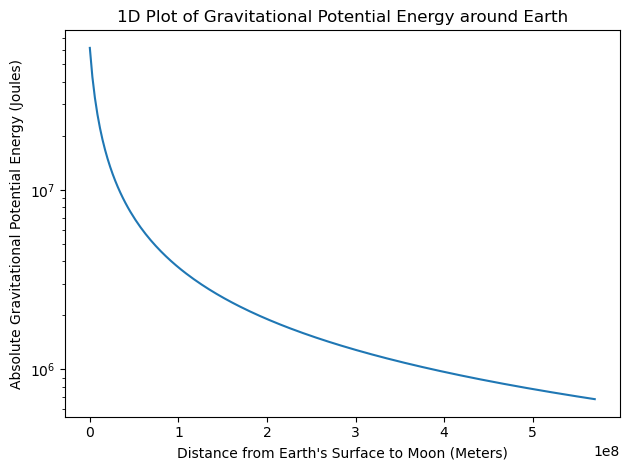

In [45]:
earth_mass = 5.9e24
earth_radius = 6.378e6
moon_distance = 3.8e8

n=200
x = np.linspace(0,moon_distance*1.5,n)
y_zeros = np.zeros_like(x)
earth_x, earth_y = 0,0
potential_1d = np.zeros(n)

for i in range(n):
    potential_1d[i] = g_pot(earth_mass, earth_x, earth_y, x[i]+earth_radius, y_zeros[i])

fig_1d,ax_1d = plt.subplots()
ax_1d.plot(x,np.abs(potential_1d))
ax_1d.set_yscale('log')
ax_1d.set_xlabel("Distance from Earth's Surface to Moon (Meters)")
ax_1d.set_ylabel("Absolute Gravitational Potential Energy (Joules)")
ax_1d.set_title("1D Plot of Gravitational Potential Energy around Earth")
fig_1d.tight_layout()

### Question 1.3

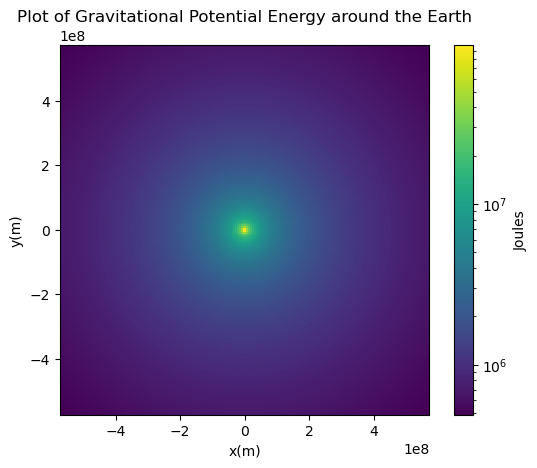

In [46]:
xvals = np.linspace(-moon_distance*1.5,moon_distance*1.5,n)
yvals = np.linspace(-moon_distance*1.5,moon_distance*1.5,n)
potential_earth = np.zeros((n,n))

for y in range(n):
    for x in range(n):
        potential_earth[y,x] = g_pot(earth_mass, earth_x, earth_y, xvals[x], yvals[y])

fig_2d,ax_2d = plt.subplots()

mesh = ax_2d.pcolormesh(xvals, yvals, np.abs(potential_earth), norm=LogNorm())
cbar = fig_2d.colorbar(mesh)
cbar.set_label('Joules')
ax_2d.set_xlabel("x(m)")
ax_2d.set_ylabel("y(m)")
ax_2d.set_title("Plot of Gravitational Potential Energy around the Earth")
ax_2d.set_aspect('equal')

# Part 2: Gravitational Potential of Earth-Moon System
---

## Question 2.1

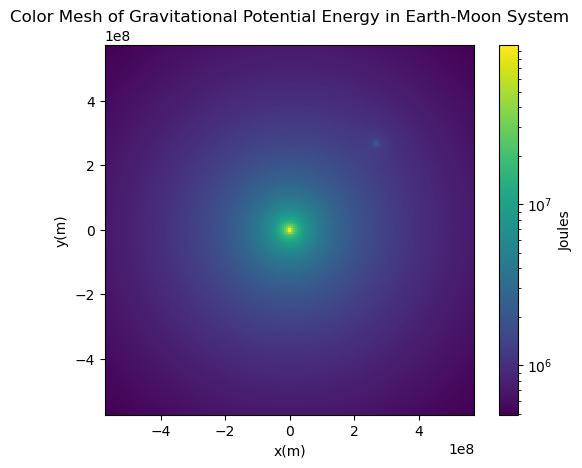

In [47]:
moon_mass = 7.3e22
moon_radius = 1737
moon_x = moon_distance / np.sqrt(2)
moon_y = moon_distance / np.sqrt(2)
potential_moon = np.zeros((n,n))
potential_combined = np.zeros((n,n))

for y in range(n):
    for x in range(n):
        potential_moon[y,x] = g_pot(moon_mass, moon_x, moon_y, xvals[x], yvals[y])
        potential_combined[y,x] = np.abs(potential_moon[y,x]) + np.abs(potential_earth[y,x])

fig_2_1,ax_2_1 = plt.subplots()

mesh_2_1 = ax_2_1.pcolormesh(xvals, yvals, potential_combined, norm = LogNorm())
cbar_2_1 = fig_2_1.colorbar(mesh_2_1)
cbar_2_1.set_label('Joules')
ax_2_1.set_xlabel("x(m)")
ax_2_1.set_ylabel("y(m)")
ax_2_1.set_title("Color Mesh of Gravitational Potential Energy in Earth-Moon System")
ax_2_1.set_aspect('equal')

## Question 2.2

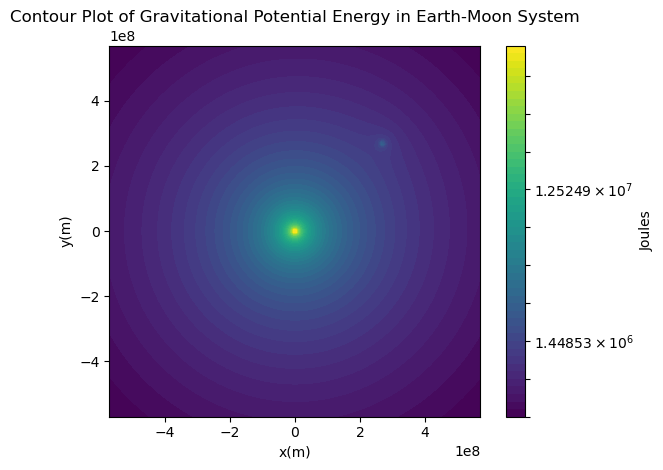

In [48]:
fig_2_2,ax_2_2 = plt.subplots()

lvls = np.logspace(np.log10(potential_combined.min()), np.log10(potential_combined.max()), 50)

contour_2_2 = ax_2_2.contourf(xvals, yvals, potential_combined, levels = lvls, norm=LogNorm())
cbar_2_2 = fig_2_2.colorbar(contour_2_2)
cbar_2_2.set_label('Joules')
ax_2_2.set_xlabel('x(m)')
ax_2_2.set_ylabel('y(m)')
ax_2_2.set_title("Contour Plot of Gravitational Potential Energy in Earth-Moon System")
ax_2_2.set_aspect('equal')
fig_2_2.tight_layout()

# Part 3: Gravitational Force Field of the Earth-Moon System

## Question 3.1

In [49]:
def g_force(M_1,m_2,x1,y1,x2,y2,surface):
    r = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    if r < surface:
        return 0,0
    else:
        F_m = (const.G * M_1 * m_2)/(r**2)

        F_x = -F_m*((x2-x1)/r)
        F_y = -F_m*((y2-y1)/r)

        return F_x,F_y

## Question 3.2

Text(0.5, 1.0, 'Streamplot of gravitational force field')

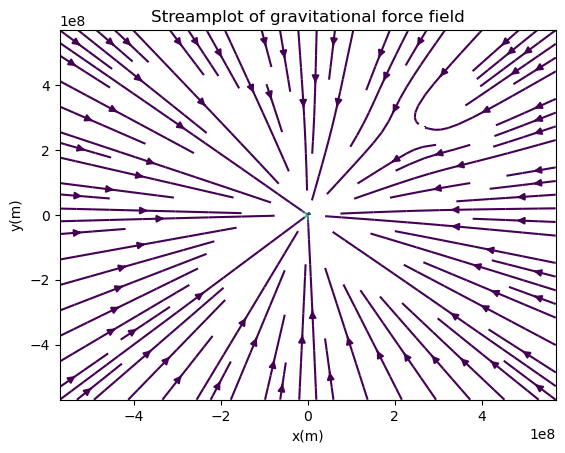

In [52]:
apollo_mass = 5500

x_grid, y_grid = np.meshgrid(xvals, yvals)
F_x_combined = np.zeros_like(x_grid)
F_y_combined = np.zeros_like(y_grid)

for y in range(n):
    for x in range(n):
        F_earth_x, F_earth_y = g_force(earth_mass, apollo_mass, earth_x, earth_y, x_grid[y,x], y_grid[y,x], earth_radius)
        F_moon_x, F_moon_y = g_force(moon_mass, apollo_mass, moon_x, moon_y, x_grid[y,x], y_grid[y,x], moon_radius)

        F_x_combined[y,x] = F_earth_x + F_moon_x
        F_y_combined[y,x] = F_earth_y + F_moon_y

colors = np.sqrt(F_x_combined**2 + F_y_combined**2)

fig_3_2, ax_3_2 = plt.subplots()
stream_3_2 = ax_3_2.streamplot(xvals, yvals, F_x_combined, F_y_combined, color = colors)
ax_3_2.set_xlabel('x(m)')
ax_3_2.set_ylabel('y(m)')
ax_3_2.set_title("Streamplot of gravitational force field")

# Part 4: Altitude of the Saturn V Rocket
---

## Question 4.1

In [30]:
m_0 = 2.8e6
m_f = 7.5e5
burn = 1.3e4

burn_time = (m_0-m_f)/burn
print(burn_time)

157.69230769230768


## Question 4.2

In [33]:
def v_delta(t, wet_mass, dry_mass, burn_rate, exhaust_speed, g):
    mass_t = wet_mass - (burn_rate * t)
    T = (wet_mass-dry_mass)/burn_rate

    if mass_t > dry_mass:
        return (exhaust_speed*np.log(wet_mass/mass_t)) - (g*t)
    else:
        return (exhaust_speed*np.log(wet_mass/dry_mass)) - (g*T)

## Question 4.3

In [53]:
from scipy.integrate import quad

def altitude(wet_mass, dry_mass, burn_rate, exhaust_speed, g):
    T = (wet_mass-dry_mass)/burn_rate
    altitude, err = quad(v_delta, 0, T, args = (wet_mass, dry_mass, burn_rate, exhaust_speed, g))
    return altitude

exhaust = 2.4e3

altitude_f = altitude(m_0, m_f, burn, exhaust, 9.81)
print(altitude_f)

74093.98013366401
